In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 101

In [3]:
df = pd.read_csv(r'dataset/sample/glass.csv', header=None)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,1.518370,13.395275,2.878488,1.408652,72.649446,0.454656,8.863170,0.185210,0.045395
std,0.003019,0.752942,1.353135,0.457066,0.709935,0.330260,1.331421,0.501716,0.095070
min,1.511309,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.922837,2.944318,1.179170,72.279600,0.147487,8.235670,0.000000,0.000000
50%,1.517620,13.296900,3.506690,1.339670,72.811600,0.558900,8.566540,0.000000,0.000000
75%,1.518935,13.776462,3.618940,1.573198,73.093000,0.608580,9.007700,0.000000,0.061200
max,1.533930,15.790650,4.490000,2.880470,75.180400,2.701350,16.190000,3.150000,0.510000


In [5]:
X = df.drop(columns=[9])
y = np.array(df[9])

In [6]:
X = pd.DataFrame(TSNE(n_components=2, random_state=seed).fit_transform(X))

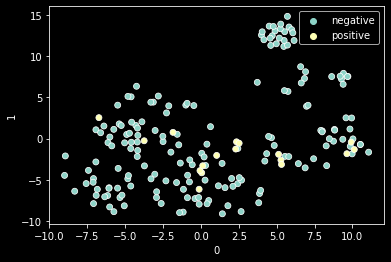

In [7]:
sns.scatterplot(X[0], X[1], hue=y)

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

Using TensorFlow backend.


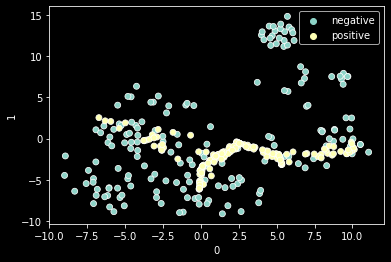

In [9]:
X_res, y_res = SMOTE(random_state=seed).fit_resample(X, y)
X_res = pd.DataFrame(X_res)
sns.scatterplot(X_res[0], X_res[1], hue=y_res)

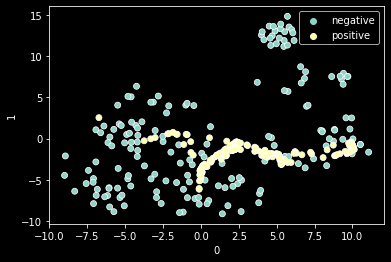

In [10]:
X_res, y_res = BorderlineSMOTE(random_state=seed).fit_resample(X, y)
X_res = pd.DataFrame(X_res)
sns.scatterplot(X_res[0], X_res[1], hue=y_res)

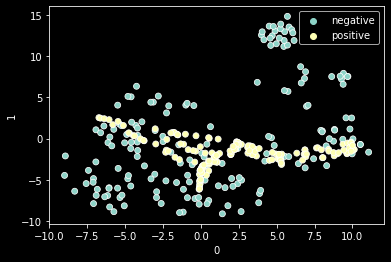

In [11]:
X_res, y_res = ADASYN(random_state=seed).fit_resample(X, y)
X_res = pd.DataFrame(X_res)
sns.scatterplot(X_res[0], X_res[1], hue=y_res)

In [12]:
d1 = pd.read_csv('creditcard_result.csv')
d2 = pd.read_csv('segmentation_result.csv')
d3 = pd.read_csv('spambase_result.csv')

In [13]:
result = pd.concat([d1, d2, d3])

In [14]:
result

,dataset,res,clf,accuracy,precision-0,precision-1,recall-0,recall-1,f1-0,f1-1
0,creditcard,smote,lr,0.958896,0.969166,0.928349,0.976262,0.907066,0.972658,0.917201
1,creditcard,smote,svm,0.952983,0.971680,0.900385,0.965524,0.915563,0.968503,0.907209
2,creditcard,smote,mlp,0.957938,0.968884,0.925689,0.975259,0.906243,0.972006,0.915390
3,creditcard,smote,dt,0.923415,0.920771,0.958089,0.984877,0.739922,0.950748,0.824235
4,creditcard,smote,knn,0.949370,0.970886,0.889740,0.961385,0.913531,0.966009,0.900698
...,...,...,...,...,...,...,...,...,...,...
30,spambase,noRes,lr,0.914847,0.936911,0.882360,0.922083,0.903621,0.929385,0.892750
31,spambase,noRes,svm,0.933624,0.946819,0.913702,0.943986,0.917549,0.945342,0.915490
32,spambase,noRes,mlp,0.934279,0.949329,0.912230,0.942549,0.921448,0.945791,0.916516
33,spambase,noRes,dt,0.880786,0.901119,0.853188,0.904488,0.844011,0.902172,0.847003


In [15]:
print(np.mean(result[result['res'] == 'smote']['f1-1']))

0.9229481703402093


In [16]:
metrics = ['accuracy', 'precision-0', 'precision-1', 'recall-0', 'recall-1', 'f1-0', 'f1-1']
clf_name = ['lr', 'svm', 'mlp', 'dt', 'knn']
res_name = ['smote', 'bsmote', 'adasyn', 'ros', 'rus', 'tl', 'noRes']

In [17]:
s = []
for res in res_name:
    sc = []
    for metric in metrics:
        sc.append(np.around(np.mean(np.array(result[result['res']==res][[metric]])), decimals=3))
    s.append(sc)

pd.DataFrame(s, columns=metrics, index=res_name)

,accuracy,precision-0,precision-1,recall-0,recall-1,f1-0,f1-1
smote,0.952,0.969,0.920,0.958,0.931,0.963,0.923
bsmote,0.931,0.976,0.854,0.919,0.949,0.945,0.895
adasyn,0.928,0.978,0.844,0.914,0.953,0.944,0.891
ros,0.951,0.969,0.919,0.957,0.929,0.963,0.922
rus,0.948,0.969,0.904,0.951,0.930,0.960,0.914
tl,0.955,0.963,0.946,0.969,0.914,0.966,0.927
noRes,0.956,0.962,0.950,0.972,0.911,0.966,0.928


In [18]:
s = []
for res in result['res'].unique():
    for clf in result['clf'].unique():
        for dataset in result['dataset'].unique():
            s.append(np.array( result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)] ))
ns = []
for i in range(len(s)):
    ns.append(s[i][0])
pd.DataFrame(ns)

,0,1,2,3,4,5,6,7,8,9
0,creditcard,smote,lr,0.958896,0.969166,0.928349,0.976262,0.907066,0.972658,0.917201
1,segmentation,smote,lr,0.995332,0.996413,0.990765,0.997837,0.984709,0.997121,0.987666
2,spambase,smote,lr,0.912882,0.949901,0.862538,0.904488,0.925905,0.926548,0.892934
3,creditcard,smote,svm,0.952983,0.971680,0.900385,0.965524,0.915563,0.968503,0.907209
4,segmentation,smote,svm,0.996498,0.996408,0.996875,0.999278,0.984709,0.997840,0.990745
...,...,...,...,...,...,...,...,...,...,...
100,segmentation,noRes,dt,0.985989,0.991395,0.963862,0.991338,0.963357,0.991345,0.963232
101,spambase,noRes,dt,0.880786,0.901119,0.853188,0.904488,0.844011,0.902172,0.847003
102,creditcard,noRes,knn,0.963526,0.962336,0.968264,0.990194,0.883937,0.976026,0.923753
103,segmentation,noRes,knn,0.994166,0.997112,0.981907,0.995676,0.987739,0.996391,0.984777


In [19]:
s = []
for res in result['res'].unique():
    for clf in result['clf'].unique():
        acc = []
        p0 = []
        p1 = []
        r0 = []
        r1 = []
        f0 = []
        f1 = []
        for dataset in result['dataset'].unique():
            acc.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['accuracy']))
            p0.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['precision-0']))
            p1.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['precision-1']))
            r0.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['recall-0']))
            r1.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['recall-1']))
            f0.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['f1-0']))
            f1.append(np.array(result[(result['res'] == res) & (result['clf'] == clf) & (result['dataset']==dataset)]['f1-1']))
        obs=[]
        obs.append(res)
        obs.append(clf)
        obs.append(np.around(np.mean(acc), decimals=3))
        obs.append(np.around(np.mean(p0), decimals=3))
        obs.append(np.around(np.mean(p1), decimals=3))
        obs.append(np.around(np.mean(r0), decimals=3))
        obs.append(np.around(np.mean(r1), decimals=3))
        obs.append(np.around(np.mean(f0), decimals=3))
        obs.append(np.around(np.mean(f1), decimals=3))
        s.append(obs)


In [20]:
width = 0.40 

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(13,10))


rect = ax.bar(x - width/2, majority_scores, width=width, label='majority', color='#00aaff')
rect2 = ax.bar(x + width/2, minority_scores, width=width, label='minority', color='#ffaa00')
ax.axes.set_ylim(np.min(majority_scores)-0.05, np.min(np.max(majority_scores)+0.02), 1.0)
ax.set_ylabel(metrics[metric_index])
ax.set_xlabel('Metric')
ax.set_title('Cross Validation Score for {}_{} (PCA=20, cv=5)'.format(res_name[res_index], clf_name[clf_index]))
ax.set_xticks(x)
ax.set_xticklabels(metrics)
autolabel(rect, ax)
autolabel(rect2, ax)
fig.legend()

NameError: name 'majority_scores' is not defined